# COLWRIT R4B The Japanese American Internment and its Legacy


---

### Professor Patricia Steenland

This notebook will explore data from the camps and provide context and techniques to analize the forced relocation of Japanese Americans during the 1940s.

*Estimated Time: 90 minutes*

---

### Topics Covered
- Data Collection and Context
- The Populations of the Camps
- Mapping and Relocation


## The Jupyter Notebook

First of all, note that this page is divided into what are called *cells*. You can navigate cells by clicking on them or by using the up and down arrows. Cells will be highlighted as you navigate them.

### Text cells

Text cells (like this one) can be edited by double-clicking on them. They're written in a simple format called [Markdown](http://daringfireball.net/projects/markdown/syntax) to add formatting and section headings.  You don't need to learn Markdown, but know the difference between Text Cells and Code Cells.

### Code cells
Other cells contain code in the Python 3 language. Don't worry -- we'll show you everything you need to know to succeed in this part of the class. 

The fundamental building block of Python code is an **expression**. Cells can contain multiple lines with multiple expressions.  We'll explain what exactly we mean by "expressions" in just a moment: first, let's learn how to "run" cells.

### Running cells

"Running a cell" is equivalent to pressing "Enter" on a calculator once you've typed in the expression you want to evaluate: it produces an **output**. When you run a text cell, it outputs clean, organized writing. When you run a code cell, it **computes** all of the expressions you want to evaluate, and can **output** the result of the computation.

<p></p>

<div class="alert alert-info">
To run the code in a code cell, first click on that cell to activate it.  It'll be highlighted with a little green or blue rectangle.  Next, you can either press the <code><b>▶|</b> Run </code> button above or press <b><code>Shift + Return</code></b> or <b><code>Shift + Enter</code></b>. This will run the current cell and select the next one.
</div>

Text cells are useful for taking notes and keeping your notebook organized, but your data analysis will be done in code cells. We will focus on code cells for the rest of the class.



In [1]:
print("Hello world!")

Hello world!


In [2]:
#This is a comment. It is put in code cells as a description or instructions and does not affect the code.

Information is expressed in different data types such as **strings and integers**. Strings are generally desriptors whereas integers act as numbers and can be operated on as numbers. (We can perform mathematical operations on them)

In [3]:
#I output a number
123

123

In [4]:
2 + 3

5

In [5]:
#I output a string
"Woohoo"

'Woohoo'

In [6]:
#Numbers can also be strings!
"123"

'123'

In [7]:
#This imports programs. You don't need to worry about it.
! pip install folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geojson
import geopandas as gpd
import io
pop_by_month = pd.read_csv("CampPopulationsByMonth.csv", error_bad_lines = False)
relocations_states = pd.read_csv("RelocationDestinations_States.csv", error_bad_lines = False)
pop_1940_to_1945 = pd.read_csv("JapaneseAmericanPopulation_1940_1945.csv", error_bad_lines = False)
relocations_cities = pd.read_csv("RelocationDestinations_Cities.csv", error_bad_lines = False)

---

## The Data <a id='data'></a>

In this notebook, you'll be working with a dataset that was manually digitized from tables in The Evacuated People: A Quantitative Description, a report published by the War Relocation Authority] in 1946. The tables required manual transcription because the results from automatic scraping contained too many errors. Thus, there may still be some human error. The datasets included contain the populations of each camp by month, the relocation destinations of those who were incarcerated, and the Japanese American population in America before and throughout the war. Take a look at the full dataset <a href = https://data.world/infinitecoop/japanese-internment-camps/> here</a>.

---

## Context <a id='data'></a>

In this course, you've been studying the consequences of Japanese American internment. Through this data and subsequent analysis, you'll be able to visualize the forced movement of Japanese Americans, from the west coast, to scattered internment camps, and eventually to cities throughout the country. 

---


## Section 1  Data Cleaning and Collection<a id='section 1'></a>

When we get a dataset it is usually in a raw form so **data cleaning** is the techniques we use in order to make the dataset usable for analysis. This next cell will return our data table of the Camp populations by month in its original form, however, the commas in the numbers make it difficult to work with. The commas make it so that all of the numbers are **strings** instead of **integers**, and we won't be able to graph them.

In [8]:
pop_by_month.head()

,Date,Total,Topaz/Central Utah,Poston/Colorado River,Gila River,Granada,Heart Mountain,Jerome,Manzanar,Minidoka,Rohwer,Tule Lake
0,06/01/1942,"17,393",0,"7,281",0,0,0,0,"9,666",0,0,446
1,07/01/1942,"27,633",0,"8,755",0,0,0,0,"9,840",0,0,"9,038"
2,08/01/1942,"40,316",0,"13,262","2,106",0,0,0,"9,928",0,0,"15,020"
3,09/01/1942,"63,031",0,"17,818","9,150",212,"5,758",0,"10,072","4,840",0,"15,181"
4,10/01/1942,"90,499","5,806","17,847","11,555",7480,"10,813",0,"10,256","9,200","2,265","15,277"


Now we'll clean the table and get rid of the commas as well as convert the 'Date' column to a format known as 'datetime.' These actions will make the table easier to work with. We replace the commas with white space

In [9]:
#Camp Populations by month 
#We can see when camps closed/opened based on where the zeros start
#Date of first of the month with the total populations over time
#Line plot could be useful
#Data collected at beginning of month?
pop_by_month = pd.read_csv("CampPopulationsByMonth.csv", error_bad_lines = False, thousands = ',')
pop_by_month['Date']= pd.to_datetime(pop_by_month['Date']) 
pop_by_month

,Date,Total,Topaz/Central Utah,Poston/Colorado River,Gila River,Granada,Heart Mountain,Jerome,Manzanar,Minidoka,Rohwer,Tule Lake
0,1942-06-01,17393,0,7281,0,0,0,0,9666,0,0,446
1,1942-07-01,27633,0,8755,0,0,0,0,9840,0,0,9038
2,1942-08-01,40316,0,13262,2106,0,0,0,9928,0,0,15020
3,1942-09-01,63031,0,17818,9150,212,5758,0,10072,4840,0,15181
4,1942-10-01,90499,5806,17847,11555,7480,10813,0,10256,9200,2265,15277
5,1942-11-01,109192,8320,17877,13368,7654,11107,7039,10181,9846,8407,15393
6,1942-12-01,110160,8294,17965,13368,7651,11105,7925,10177,9849,8515,15311
7,1943-01-01,110240,8232,8039,13420,7656,11062,7932,10121,9861,8548,15369
8,1943-02-01,110353,8214,18025,13411,7622,11006,8354,10079,9814,8538,15274
9,1943-03-01,110181,8152,17984,13374,7619,10959,8587,9796,9924,8528,15219


Now we can look at this data and start to see beyond the numbers. **Over-laid line plot comparing the change in populations of the camps by month** We have it without a for loop for now.

In [10]:
camps = pd.read_csv('BehindBarbedWire_StoryMap_InternmentCampLocationsMap_Data.csv', error_bad_lines = False)
camps["Maximum Population"] = camps["Maximum Population"].str.replace(',', '')
camps['Maximum Population'] = camps['Maximum Population'].astype(float)
camps

,Internment Camp Name,Location,State,Latitude,Longitude,Opened,Closed,Maximum Population
0,Gila River Relocation Center,Rivers,Arizona,33.065083,-111.830528,20-Jul-42,16-Nov-45,13348.0
1,Poston Relocation Center,Parker,Arizona,33.987500,-114.401111,2-Jun-42,28-Nov-45,17814.0
2,Jerome Relocation Center,Denson,Arkansas,33.411667,-91.461111,6-Oct-42,30-Jun-44,8497.0
3,Rohwer Relocation Center,McGehee,Arkansas,33.766297,-91.280158,18-Sep-42,30-Nov-45,8475.0
4,Manzanar Relocation Center,Manzanar,California,36.728333,-118.154444,2-Jun-42,21-Nov-45,10046.0
5,Tule Lake Relocation Center,Newell,California,41.889444,-121.374722,27-May-42,20-Mar-46,18789.0
6,Granada Relocation Center,Amache,Colorado,38.049444,-102.328611,27-Aug-42,15-Oct-45,7318.0
7,Minidoka Relocation Center,Hunt,Idaho,42.679000,-114.244000,10-Aug-42,28-Oct-45,9397.0
8,Topaz Relocation Center,Topaz,Utah,39.418336,-112.708750,11-Sep-42,31-Oct-45,8130.0
9,Heart Mountain Relocation Center,Heart Mountain,Wyoming,44.671667,-108.946389,12-Aug-42,10-Nov-45,343.0


Sometimes numbers don't always add up. We have to separate tables with data about the internment camps, collected by two separate organizations. Say we try to compare the maximum population of the Manzanar camps from both tables.

In [11]:
pop_by_month_max = pop_by_month['Manzanar'].max()
camps_max = int(camps[camps['Internment Camp Name'] == 'Manzanar Relocation Center']['Maximum Population'])
print('Camps Data:',  camps_max)
print('Popuation by Month Data:' ,  pop_by_month_max)
#Are the two numbers equal?

Camps Data: 10046
Popuation by Month Data: 10256


The two numbers don't equal each other! The pop_by_month table says that the maximum population of Manzanar was 10,256, while the camps table says that the maximum was 10,046 people. While this isn't a huge difference, it's important to remember that there can be error in your datasets, and not to take any one dataset as complete and total fact. 

Text(0, 0.5, 'Population')

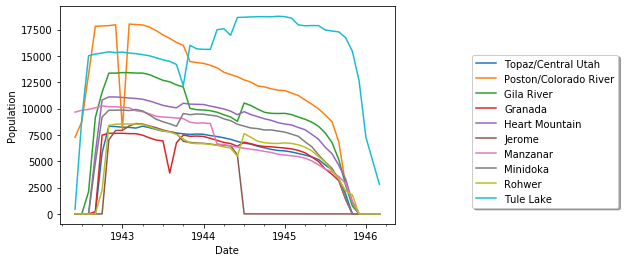

<Figure size 1080x1440 with 0 Axes>

In [28]:
m = pop_by_month.set_index("Date").drop("Total", axis = 1)
j = m.plot.line()
plt.figure(figsize = (15, 20))
j.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
j.set_ylabel("Population")

In [38]:
japanese=pd.read_csv("JapaneseAmericanPopulation_1940_1945_LL.csv", error_bad_lines = False)
japanese.head()

,County,State,1940,1945,% returned,Latitude,Longitude
0,Alameda,CA,5167,2703,52.3,37.779872,-122.282185
1,Amador,CA,2,0,0.0,37.667910,-121.873914
2,Butte,CA,216,107,49.5,46.003823,-112.534777
3,Calaveras,CA,6,0,0.0,36.159706,-95.958341
4,Colusa,CA,155,48,31.0,39.214334,-122.009417


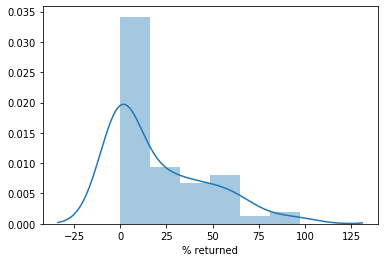

In [39]:
sns.distplot(japanese['% returned']);

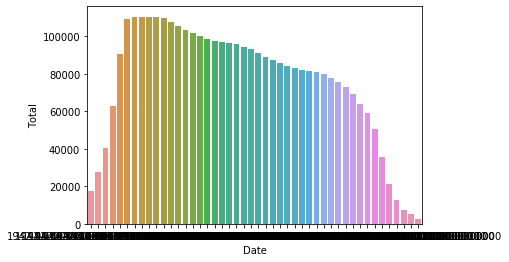

In [14]:
#for col in enumerate(pop_by_month.columns[2:]):
#    print(col)
#    print(pop_by_month.columns[2:])
#    sns.lineplot(x="Date", y = col, data = pop_by_month)
sns.barplot("Date", "Total", data = pop_by_month)

#come back to this

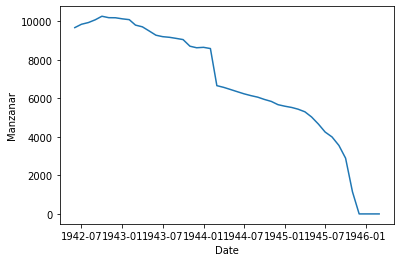

In [15]:
sns.lineplot(x="Date", y= 'Manzanar',
             data = pop_by_month)

Visualizations allow us to picture how the numbers change and find abnormalities in the data set. What are some abnormalities that you see? What could be possible reasons for these?

<b>Answer: </b> YOUR ANSWER HERE

---

## Section 2 Assembly Centers and Internment Centers<a id='section 2'></a>

After Executive Order 9066 was signed, the army was authorized to remove civilians from designated military exclusion zones spanning Washington, Oregon, California, and Arizona. Assembly centers were created to funnel Japanese Americans into internment camps. Through these maps, you can see how many people were forced from one location to another. Mapping data is a useful tool to visualize locations and provide context when we are given longitude and latitude data!

In [16]:
assembly = pd.read_csv('BehindBarbedWire_StoryMap_AssemblyCentersMap_Data.csv', error_bad_lines = False)
assembly.dropna(subset=['Latitude', 'Longitude']).dropna(axis = 1)
#assembly.dtypes

,Location,State,Number of People,Latitude,Longitude
0,Sacramento (Walerga),California,4598,38.566700,-121.483300
2,Manzanar (Up to 6/1/42),California,9564,36.728333,-118.154444
3,Fresno,California,5069,36.733300,-119.766700
4,Marysville (Arboga),California,2406,39.050000,-121.550050
5,Mayer,Arizona,249,34.383300,-112.233300
6,Merced,California,4081,37.300000,-120.466700
7,Pinedale,California,4664,36.840000,-119.800000
8,Pomona,California,5272,34.050000,-117.750000
9,Portland (Pacific Int. Exposition Ground),Oregon,3667,45.516700,-122.666700
10,Puyallup,Washington,7348,47.183300,-122.283300


In [17]:
#need to make this a bubble folium map
m = folium.Map(location=[36.733300, -100.766700], zoom_start = 4)
tooltip = 'Click me!'
n = folium.Marker([38.566700, -121.483300], popup='<i>Mt. Hood Meadows</i>', tooltip='Sacramento(Walerga)').add_to(m)
n = folium.Marker([36.728333, -118.154444], popup='<i>Mt. Hood Meadows</i>', tooltip='Manzanar').add_to(m)
n = folium.Marker([36.733300, -119.766700], popup='<i>Mt. Hood Meadows</i>', tooltip='Fresno').add_to(m)
n = folium.Marker([34.383300, -112.233300], popup='<i>Mt. Hood Meadows</i>', tooltip='Mayer, AZ').add_to(m)
n = folium.Marker([39.050000, -121.550050], popup='<i>Mt. Hood Meadows</i>', tooltip='Marysville (Arboga)').add_to(m)
n = folium.Marker([37.300000, -120.466700], popup='<i>Mt. Hood Meadows</i>', tooltip='Merced').add_to(m)
n = folium.Marker([34.383300, -112.233300], popup='<i>Mt. Hood Meadows</i>', tooltip='Pinedale').add_to(m)
n = folium.Marker([34.050000, -117.750000], popup='<i>Mt. Hood Meadows</i>', tooltip='Pomona').add_to(m)
n = folium.Marker([45.516700, -122.666700], popup='<i>Mt. Hood Meadows</i>', tooltip='Portlan, OR').add_to(m)
n = folium.Marker([47.183300, -122.283300], popup='<i>Mt. Hood Meadows</i>', tooltip='Puyallup').add_to(m)
n = folium.Marker([36.666700, -121.650000], popup='<i>Mt. Hood Meadows</i>', tooltip='Salinas').add_to(m)
n = folium.Marker([34.133300, -118.033300], popup='<i>Mt. Hood Meadows</i>', tooltip='Santa Anita').add_to(m)
n = folium.Marker([37.950000, -121.283300], popup='<i>Mt. Hood Meadows</i>', tooltip='Stockton').add_to(m)
n = folium.Marker([37.616700, -122.400000], popup='<i>Mt. Hood Meadows</i>', tooltip='Tanforan').add_to(m)
n = folium.Marker([36.200000, -119.333300], popup='<i>Mt. Hood Meadows</i>', tooltip='Tulare').add_to(m)
n = folium.Marker([37.483300, -120.833300], popup='<i>Mt. Hood Meadows</i>', tooltip='Turlock').add_to(m)

m

Japanese Americans were transported from assembly centers to internment camps across the country

In [80]:
camps = pd.read_csv('BehindBarbedWire_StoryMap_InternmentCampLocationsMap_Data.csv', error_bad_lines = False)
camps["Maximum Population"] = camps["Maximum Population"].str.replace(',', '')
camps['Maximum Population'] = camps['Maximum Population'].astype(float)
camps

,Internment Camp Name,Location,State,Latitude,Longitude,Opened,Closed,Maximum Population
0,Gila River Relocation Center,Rivers,Arizona,33.065083,-111.830528,20-Jul-42,16-Nov-45,13348.0
1,Poston Relocation Center,Parker,Arizona,33.987500,-114.401111,2-Jun-42,28-Nov-45,17814.0
2,Jerome Relocation Center,Denson,Arkansas,33.411667,-91.461111,6-Oct-42,30-Jun-44,8497.0
3,Rohwer Relocation Center,McGehee,Arkansas,33.766297,-91.280158,18-Sep-42,30-Nov-45,8475.0
4,Manzanar Relocation Center,Manzanar,California,36.728333,-118.154444,2-Jun-42,21-Nov-45,10046.0
5,Tule Lake Relocation Center,Newell,California,41.889444,-121.374722,27-May-42,20-Mar-46,18789.0
6,Granada Relocation Center,Amache,Colorado,38.049444,-102.328611,27-Aug-42,15-Oct-45,7318.0
7,Minidoka Relocation Center,Hunt,Idaho,42.679000,-114.244000,10-Aug-42,28-Oct-45,9397.0
8,Topaz Relocation Center,Topaz,Utah,39.418336,-112.708750,11-Sep-42,31-Oct-45,8130.0
9,Heart Mountain Relocation Center,Heart Mountain,Wyoming,44.671667,-108.946389,12-Aug-42,10-Nov-45,343.0


In [15]:
m = folium.Map(location=[36.733300, -100.766700], zoom_start=4)
tooltip = 'Click me!'
for i in range(0,len(camps)):
    folium.Circle(
      location=(camps.iloc[i]['Latitude'], camps.iloc[i]['Longitude']),
      popup=camps.iloc[i]['Internment Camp Name'],
      radius=camps.iloc[i]['Maximum Population'] * 10,
      color='crimson',
      fill=True,
      fill_color='crimson').add_to(m)
m

In [16]:
m = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)
for i in range(0,len(camps)):
    folium.Marker(
      location=[camps.iloc[i]['Longitude'], camps.iloc[i]['Latitude']],
      popup=camps.iloc[i]['Internment Camp Name'],
      tooltip='Gila River Relocation Center',
      #radius=camps.iloc[i]['Maximum Population']*10000,
      color='crimson',
      fill=True,
      fill_color='crimson').add_to(m)
m

In [17]:
m = folium.Map(location=[36.733300, -100.766700], zoom_start = 4)
tooltip = 'Click me!'
n = folium.Marker([33.065083, -111.830528], popup='<i>Mt. Hood Meadows</i>', tooltip='Gila River Relocation Center').add_to(m)
n = folium.Marker([33.987500, -114.401111], popup='<i>Mt. Hood Meadows</i>', tooltip='Poston Relocation Center').add_to(m)
n = folium.Marker([33.411667, -91.461111], popup='<i>Mt. Hood Meadows</i>', tooltip='Jerome Relocation Center').add_to(m)
n = folium.Marker([33.766297, -91.280158], popup='<i>Mt. Hood Meadows</i>', tooltip='Rohwer Relocation Center').add_to(m)
n = folium.Marker([36.728333, -118.154444], popup='<i>Mt. Hood Meadows</i>', tooltip='Manzanar Relocation Center').add_to(m)
n = folium.Marker([41.889444, -121.374722], popup='<i>Mt. Hood Meadows</i>', tooltip='Tule Lake Relocation Center').add_to(m)
n = folium.Marker([38.049444, -102.328611], popup='<i>Mt. Hood Meadows</i>', tooltip='Granada Relocation Center').add_to(m)
n = folium.Marker([42.679000, -114.244000], popup='<i>Mt. Hood Meadows</i>', tooltip='Minidoka Relocation Center').add_to(m)
n = folium.Marker([39.418336, -112.708750], popup='<i>Mt. Hood Meadows</i>', tooltip='Topaz Relocation Center').add_to(m)
n = folium.Marker([44.671667, -108.946389], popup='<i>Mt. Hood Meadows</i>', tooltip='Heart Mountain Relocation Center').add_to(m)

m

## Section 3  Mapping and Movement<a id='section 3'></a>

The biggest impact, among many, of Japanese internment was the subsequent relocation of Japanese Americans across the nation. While they had originally been settled and successful on the west coast, the effects of their forced internment ruined their lives, forcing them to uproot themselves and start anew

In [18]:
#Use in conjuction with relocation Destinations to track movement
japanese=pd.read_csv("JapaneseAmericanPopulation_1940_1945_LL.csv", error_bad_lines = False)
japanese['1940'] = japanese['1940'].astype(float)
japanese['1945'] = japanese['1945'].astype(float)
japanese.head()

,County,State,1940,1945,% returned,Latitude,Longitude
0,Alameda,CA,5167.0,2703.0,52.3,37.779872,-122.282185
1,Amador,CA,2.0,0.0,0.0,37.667910,-121.873914
2,Butte,CA,216.0,107.0,49.5,46.003823,-112.534777
3,Calaveras,CA,6.0,0.0,0.0,36.159706,-95.958341
4,Colusa,CA,155.0,48.0,31.0,39.214334,-122.009417


In [19]:
m = folium.Map(location=[36.733300, -100.766700], zoom_start=4)
tooltip = 'Click me!'
for i in range(0,len(japanese)):
    folium.Circle(
      location=(japanese.iloc[i]['Latitude'], japanese.iloc[i]['Longitude']),
      popup=japanese.iloc[i]['County'],
      radius=japanese.iloc[i]['1940'] * 50,
      color='crimson',
      fill=True,
      fill_color='crimson').add_to(m)
m

In [27]:
m = folium.Map(location=[36.733300, -100.766700], zoom_start=4)
tooltip = 'Click me!'
for i in range(0,len(japanese)):
    folium.Circle(
      location=(japanese.iloc[i]['Latitude'], japanese.iloc[i]['Longitude']),
      popup=japanese.iloc[i]['County'],
      radius=japanese.iloc[i]['1945'] * 50,
      color='blue',
      fill=True,
      fill_color='red').add_to(m)
m

In [21]:
reloc_cities=pd.read_csv("RelocationDestinations_Cities_LL.csv", error_bad_lines = False)
reloc_cities['People'] = reloc_cities['People'].astype(float)
reloc_cities.head()

,City,State,People,Latitude,Longitude
0,Glendale,AZ,487.0,34.142508,-118.255075
1,Alameda,CA,211.0,37.779872,-122.282185
2,Berkely,CA,844.0,37.871523,-122.273042
3,Burbank,CA,228.0,34.180839,-118.308966
4,Dinuba,CA,201.0,36.543284,-119.387066


In [26]:
m = folium.Map(location=[36.733300, -100.766700], zoom_start=4)
tooltip = 'Click me!'
for i in range(0,len(reloc_cities)):
    folium.Circle(
      location=(reloc_cities.iloc[i]['Latitude'], reloc_cities.iloc[i]['Longitude']),
      popup=reloc_cities.iloc[i]['City'],
      radius=reloc_cities.iloc[i]['People'] * 50,
      color='blue',
      fill=True,
      fill_color='red').add_to(m)
m

---
Notebook developed by: Alleanna Clark, Aishah Mahmud

Data Science Modules: http://data.berkeley.edu/education/modules
